# 📊 IoT Security Platform - Data Analysis

**Author:** Wafaa EL HADCHI  
**Date:** November 2025  
**Goal:** Analyze IoT telemetry data and prepare for ML training

---

## 1️⃣ Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import joblib
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## 2️⃣ Load Dataset

In [3]:
# Load the enhanced dataset
df = pd.read_csv('../data/smart_system_anomaly_dataset.csv')

print(f"📊 Dataset loaded successfully!")
print(f"   Shape: {df.shape}")
print(f"   Columns: {df.columns.tolist()}")

# Display first few rows
df.head()

📊 Dataset loaded successfully!
   Shape: (10000, 14)
   Columns: ['timestamp', 'device_id', 'device_type', 'cpu_usage', 'memory_usage', 'network_in_kb', 'network_out_kb', 'packet_rate', 'avg_response_time_ms', 'service_access_count', 'failed_auth_attempts', 'is_encrypted', 'geo_location_variation', 'label']


,timestamp,device_id,device_type,cpu_usage,memory_usage,network_in_kb,network_out_kb,packet_rate,avg_response_time_ms,service_access_count,failed_auth_attempts,is_encrypted,geo_location_variation,label
0,2025-06-20 12:51:55.452400,thermostat_38,thermostat,66.74,75.540,77,849,372,419.920,2,7,0,18.19,Normal
1,2025-06-20 12:51:56.452400,smart_light_37,smart,19.92,16.700,526,1492,635,32.690,3,3,1,2.98,Normal
2,2025-06-20 12:51:57.452400,sensor_1,sensor,10.08,48.620,577,923,220,418.910,4,10,0,9.66,Normal
3,2025-06-20 12:51:58.452400,sensor_9,sensor,95.00,44.198,800,360,1684,120.258,5,6,1,15.00,Anomaly_DoS
4,2025-06-20 12:51:59.452400,smart_light_31,smart,50.62,48.150,104,1176,605,340.410,7,1,1,11.21,Normal


## 3️⃣ Basic Dataset Information

In [4]:
# Dataset info
print("📋 Dataset Information:")
print(f"   Total records: {len(df):,}")
print(f"   Features: {len(df.columns)}")
print(f"   Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"\n   Missing values: {df.isnull().sum().sum()}")
print(f"   Duplicate records: {df.duplicated().sum()}")

# Data types
print("\n📝 Data Types:")
df.dtypes

📋 Dataset Information:
   Total records: 10,000
   Features: 14
   Memory usage: 3.12 MB

   Missing values: 0
   Duplicate records: 0

📝 Data Types:


timestamp                  object
device_id                  object
device_type                object
cpu_usage                 float64
memory_usage              float64
network_in_kb               int64
network_out_kb              int64
packet_rate                 int64
avg_response_time_ms      float64
service_access_count        int64
failed_auth_attempts        int64
is_encrypted                int64
geo_location_variation    float64
label                      object
dtype: object

## 4️⃣ Label Distribution

🏷️  Label Distribution:
   Normal              : 7,948 (79.48%)
   Anomaly_DoS         :   997 ( 9.97%)
   Anomaly_Injection   :   563 ( 5.63%)
   Anomaly_Spoofing    :   492 ( 4.92%)


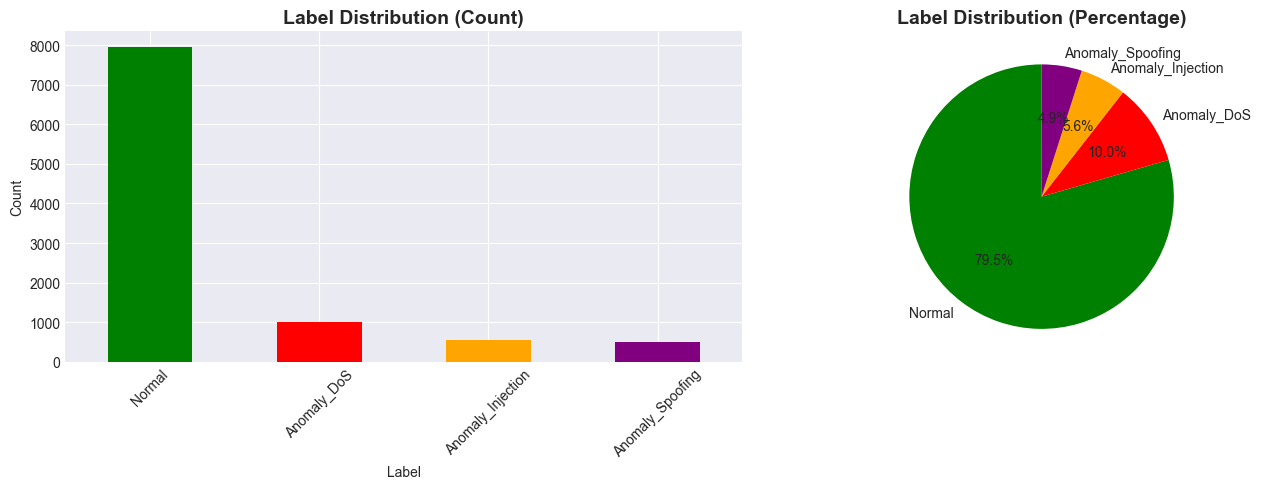

In [5]:
# Count labels
label_counts = df['label'].value_counts()
label_pct = df['label'].value_counts(normalize=True) * 100

print("🏷️  Label Distribution:")
for label in label_counts.index:
    print(f"   {label:20s}: {label_counts[label]:5,} ({label_pct[label]:5.2f}%)")

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
label_counts.plot(kind='bar', ax=ax1, color=['green', 'red', 'orange', 'purple'])
ax1.set_title('Label Distribution (Count)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Label')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)

# Pie chart
label_counts.plot(kind='pie', ax=ax2, autopct='%1.1f%%', startangle=90,
                  colors=['green', 'red', 'orange', 'purple'])
ax2.set_title('Label Distribution (Percentage)', fontsize=14, fontweight='bold')
ax2.set_ylabel('')

plt.tight_layout()
plt.show()

## 5️⃣ Device Type Distribution

🖥️  Device Type Distribution:
   sensor         : 2,647 (26.47%)
   camera         : 2,468 (24.68%)
   thermostat     : 2,465 (24.65%)
   smart          : 2,420 (24.20%)

   Unique devices: 200


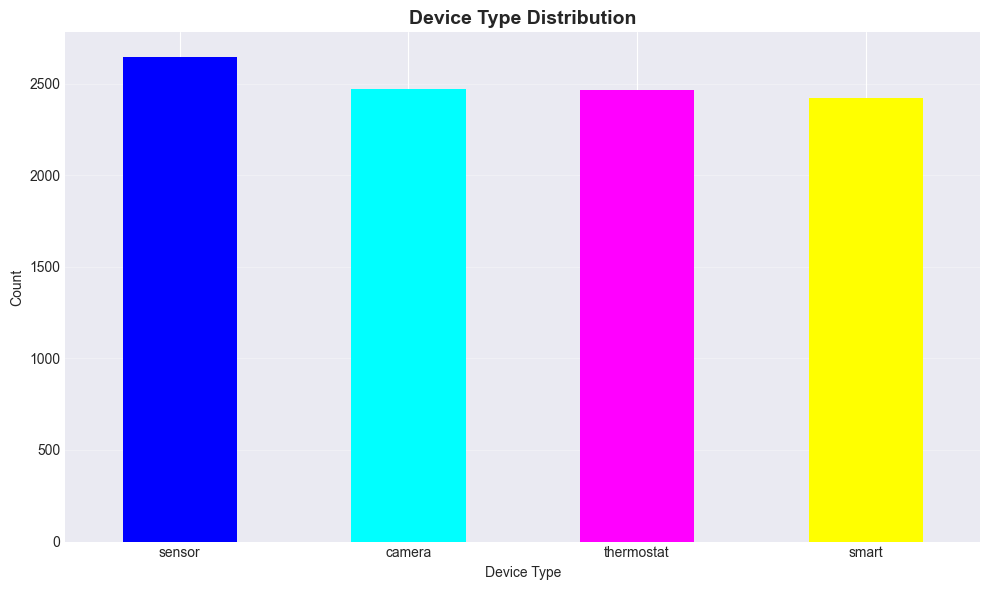

In [6]:
# Device types
device_counts = df['device_type'].value_counts()

print("🖥️  Device Type Distribution:")
for dtype in device_counts.index:
    count = device_counts[dtype]
    pct = (count / len(df)) * 100
    print(f"   {dtype:15s}: {count:5,} ({pct:5.2f}%)")

print(f"\n   Unique devices: {df['device_id'].nunique()}")

# Visualize
plt.figure(figsize=(10, 6))
device_counts.plot(kind='bar', color=['blue', 'cyan', 'magenta', 'yellow'])
plt.title('Device Type Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Device Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 6️⃣ Statistical Summary

In [7]:
# Numerical features
numerical_cols = ['cpu_usage', 'memory_usage', 'network_in_kb', 'network_out_kb',
                  'packet_rate', 'avg_response_time_ms', 'failed_auth_attempts',
                  'geo_location_variation']

print("📈 Statistical Summary:")
df[numerical_cols].describe().round(2)

📈 Statistical Summary:


,cpu_usage,memory_usage,network_in_kb,network_out_kb,packet_rate,avg_response_time_ms,failed_auth_attempts,geo_location_variation
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,53.79,49.85,879.10,774.89,570.26,280.65,5.51,10.32
std,24.50,22.61,579.75,466.76,374.86,166.09,3.42,5.90
min,10.02,10.03,10.00,8.00,50.00,20.08,0.00,0.00
25%,32.98,30.63,426.00,379.00,283.00,146.84,3.00,5.17
50%,54.20,49.81,835.00,758.00,540.00,270.12,6.00,10.40
75%,75.15,68.90,1229.00,1140.00,799.00,398.38,8.00,15.60
max,95.00,90.00,2998.00,2248.00,2000.00,898.74,14.00,20.00


## 7️⃣ Compare Normal vs Anomalies

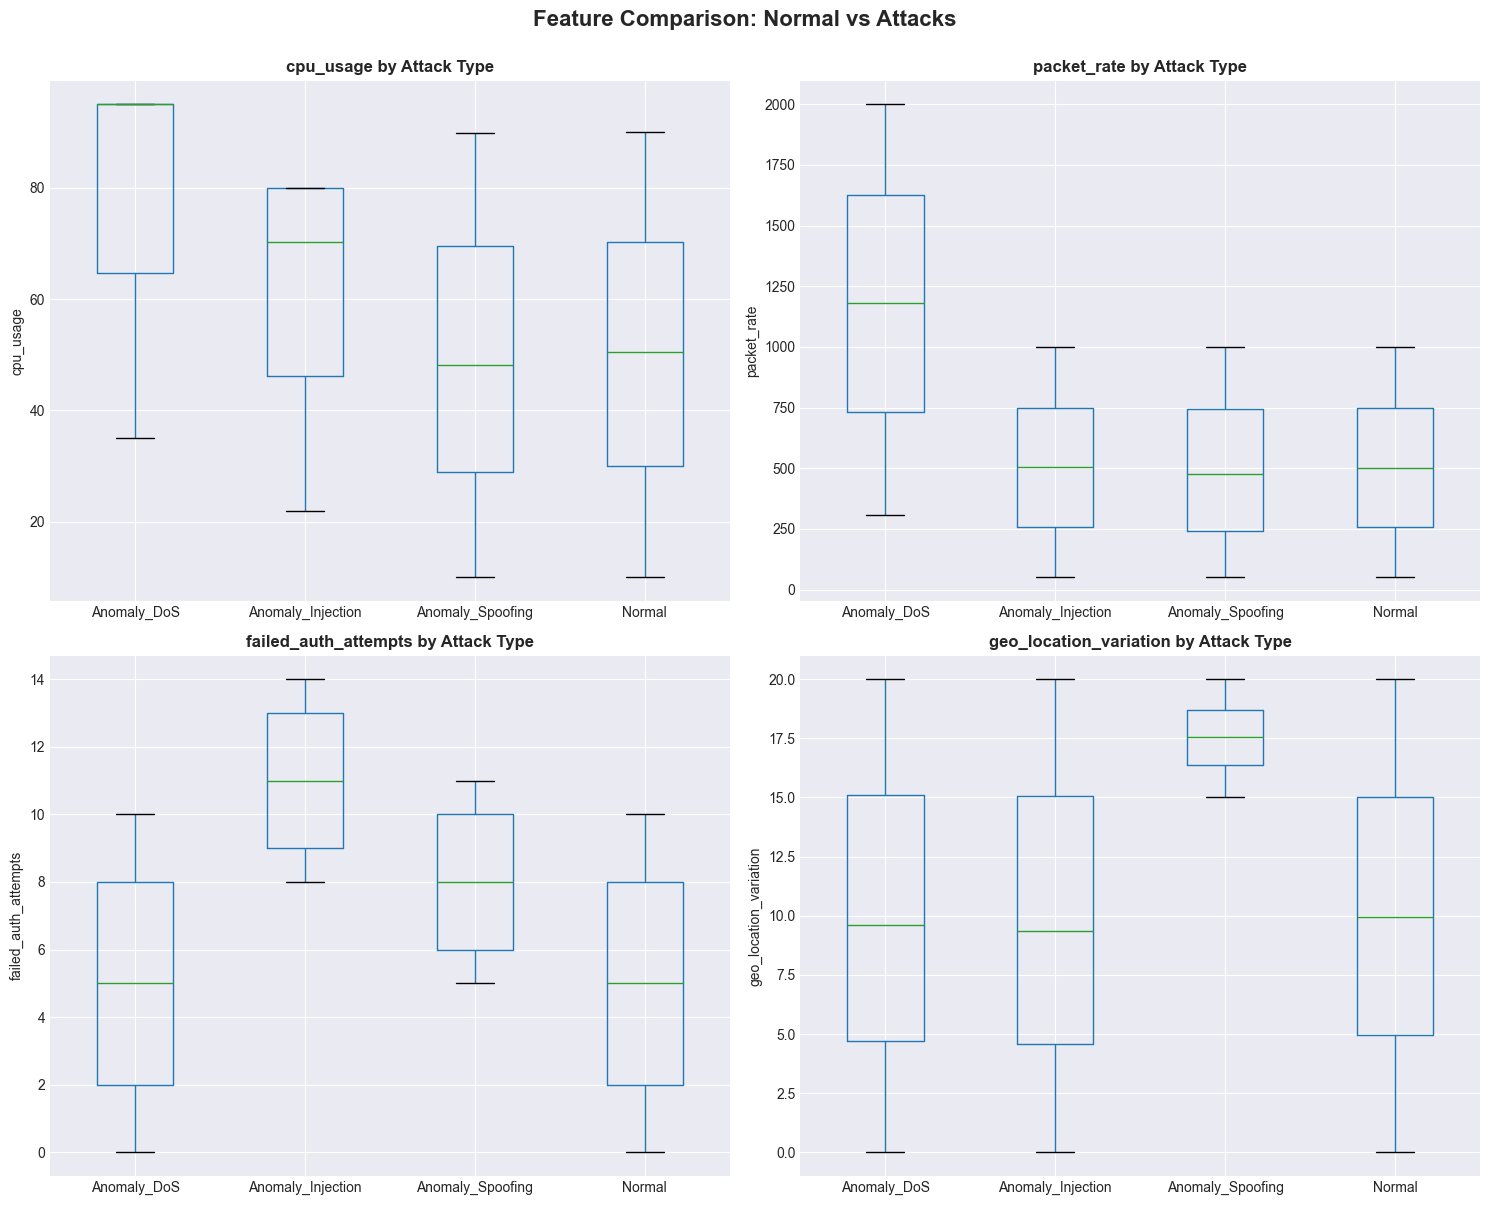

In [8]:
# Compare key features
comparison_features = ['cpu_usage', 'packet_rate', 'failed_auth_attempts', 'geo_location_variation']

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, feat in enumerate(comparison_features):
    df.boxplot(column=feat, by='label', ax=axes[idx])
    axes[idx].set_title(f'{feat} by Attack Type', fontweight='bold')
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel(feat)

plt.suptitle('Feature Comparison: Normal vs Attacks', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

## 8️⃣ Attack Pattern Analysis

In [9]:
# Analyze each attack type
print("🚨 ATTACK PATTERN ANALYSIS")
print("=" * 80)

for attack_type in ['Anomaly_DoS', 'Anomaly_Injection', 'Anomaly_Spoofing']:
    print(f"\n{attack_type}:")
    print("-" * 80)
    
    attack_data = df[df['label'] == attack_type]
    normal_data = df[df['label'] == 'Normal']
    
    for feat in comparison_features:
        normal_mean = normal_data[feat].mean()
        attack_mean = attack_data[feat].mean()
        diff_pct = ((attack_mean - normal_mean) / normal_mean) * 100
        
        status = "🌟" if abs(diff_pct) > 30 else "✅" if abs(diff_pct) > 15 else "⚠️"
        
        print(f"  {status} {feat:25s}: {normal_mean:7.1f} → {attack_mean:7.1f} ({diff_pct:+6.1f}%)")

🚨 ATTACK PATTERN ANALYSIS

Anomaly_DoS:
--------------------------------------------------------------------------------
  🌟 cpu_usage                :    50.2 →    79.9 ( +59.2%)
  🌟 packet_rate              :   503.3 →  1183.4 (+135.1%)
  ⚠️ failed_auth_attempts     :     5.0 →     5.1 (  +0.7%)
  ⚠️ geo_location_variation   :    10.0 →     9.8 (  -1.3%)

Anomaly_Injection:
--------------------------------------------------------------------------------
  ✅ cpu_usage                :    50.2 →    62.4 ( +24.2%)
  ⚠️ packet_rate              :   503.3 →   500.8 (  -0.5%)
  🌟 failed_auth_attempts     :     5.0 →    11.1 (+121.6%)
  ⚠️ geo_location_variation   :    10.0 →     9.8 (  -2.2%)

Anomaly_Spoofing:
--------------------------------------------------------------------------------
  ⚠️ cpu_usage                :    50.2 →    48.9 (  -2.7%)
  ⚠️ packet_rate              :   503.3 →   488.6 (  -2.9%)
  🌟 failed_auth_attempts     :     5.0 →     7.9 ( +58.0%)
  🌟 geo_location_variat

## 9️⃣ Correlation Analysis

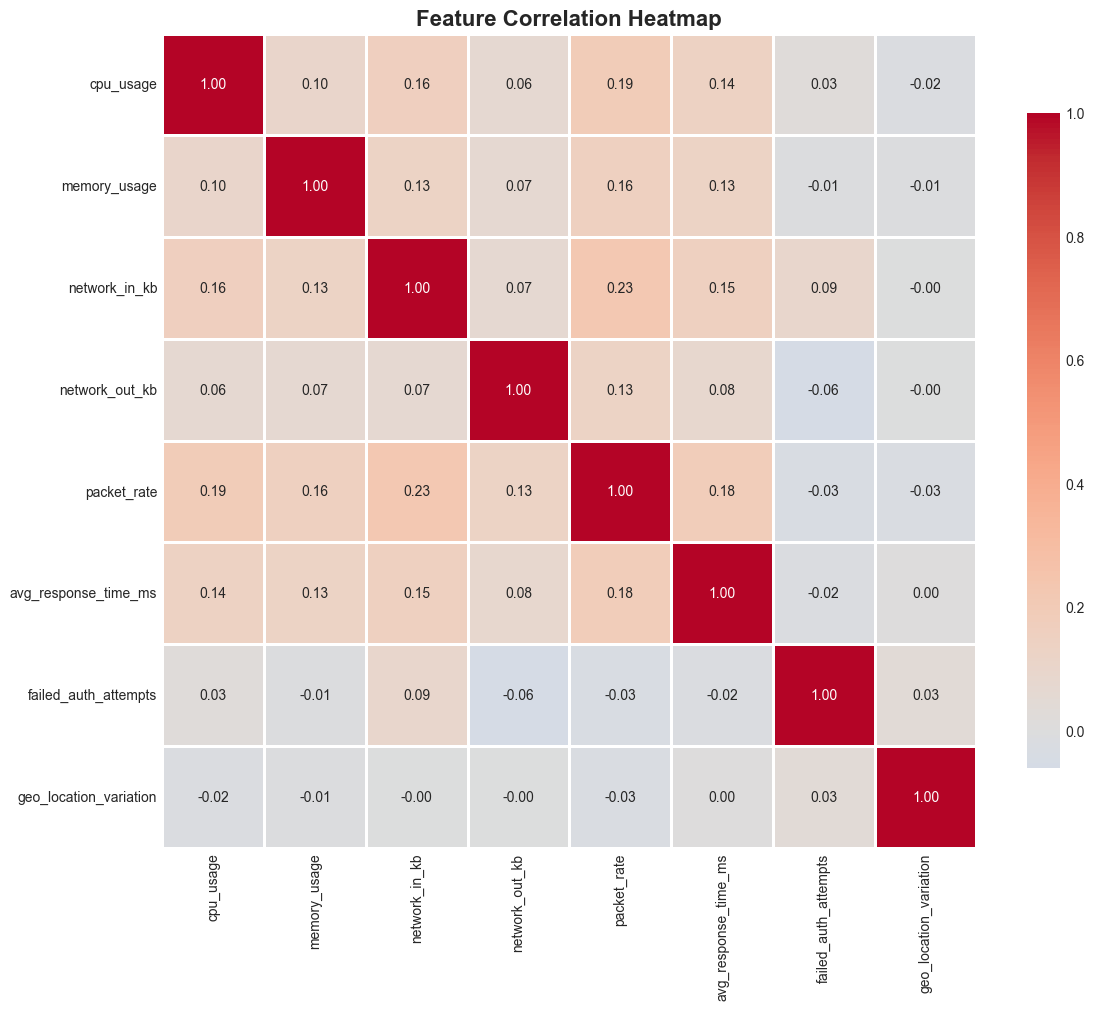


🔍 Strong Correlations (|r| > 0.5):


In [10]:
# Correlation matrix
plt.figure(figsize=(12, 10))
correlation = df[numerical_cols].corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()

plt.show()

print("\n🔍 Strong Correlations (|r| > 0.5):")
for i in range(len(correlation.columns)):
    for j in range(i+1, len(correlation.columns)):
        if abs(correlation.iloc[i, j]) > 0.5:
            print(f"   {correlation.columns[i]:25s} ↔ {correlation.columns[j]:25s}: {correlation.iloc[i, j]:+.3f}")

## 🔟 Feature Engineering

In [11]:
# Create derived features
print("🔧 Creating derived features...")

df['network_total'] = df['network_in_kb'] + df['network_out_kb']
df['network_ratio'] = df['network_out_kb'] / (df['network_in_kb'] + 1)  # Avoid division by zero
df['cpu_memory_product'] = df['cpu_usage'] * df['memory_usage']

print("✅ Created 3 derived features:")
print("   - network_total")
print("   - network_ratio")
print("   - cpu_memory_product")

# Select all features for ML
features = [
    'cpu_usage', 'memory_usage', 'network_in_kb', 'network_out_kb',
    'packet_rate', 'avg_response_time_ms', 'service_access_count',
    'failed_auth_attempts', 'is_encrypted', 'geo_location_variation',
    'network_total', 'network_ratio', 'cpu_memory_product'
]

print(f"\n📋 Total features for ML: {len(features)}")

🔧 Creating derived features...
✅ Created 3 derived features:
   - network_total
   - network_ratio
   - cpu_memory_product

📋 Total features for ML: 13


## 1️⃣1️⃣ Train/Test Split

In [12]:
# Prepare X and y
X = df[features]
y = df['label']

print(f"📊 Feature matrix: {X.shape}")
print(f"🏷️  Labels: {y.shape}")

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n✂️  Data split complete:")
print(f"   Training set: {X_train.shape[0]:,} samples")
print(f"   Test set: {X_test.shape[0]:,} samples")

# Check label distribution in splits
print("\n📊 Label distribution:")
print("\n   Training set:")
train_dist = y_train.value_counts(normalize=True) * 100
for label, pct in train_dist.items():
    print(f"      {label:20s}: {pct:5.2f}%")

print("\n   Test set:")
test_dist = y_test.value_counts(normalize=True) * 100
for label, pct in test_dist.items():
    print(f"      {label:20s}: {pct:5.2f}%")

📊 Feature matrix: (10000, 13)
🏷️  Labels: (10000,)

✂️  Data split complete:
   Training set: 8,000 samples
   Test set: 2,000 samples

📊 Label distribution:

   Training set:
      Normal              : 79.47%
      Anomaly_DoS         :  9.98%
      Anomaly_Injection   :  5.62%
      Anomaly_Spoofing    :  4.92%

   Test set:
      Normal              : 79.50%
      Anomaly_DoS         :  9.95%
      Anomaly_Injection   :  5.65%
      Anomaly_Spoofing    :  4.90%


## 1️⃣2️⃣ Feature Scaling

In [13]:
# Normalize features
print("🔄 Normalizing features with StandardScaler...")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Features normalized!")
print(f"   Mean: ~0, Std: ~1")

# Convert back to DataFrame for easier handling
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=features)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=features)

# Show sample
print("\n📊 Sample of scaled features:")
X_train_scaled_df.head()

🔄 Normalizing features with StandardScaler...
✅ Features normalized!
   Mean: ~0, Std: ~1

📊 Sample of scaled features:


,cpu_usage,memory_usage,network_in_kb,network_out_kb,packet_rate,avg_response_time_ms,service_access_count,failed_auth_attempts,is_encrypted,geo_location_variation,network_total,network_ratio,cpu_memory_product
0,-0.068052,-0.789225,-0.208365,-0.242363,3.731756,3.625038,0.760100,-0.730938,1.017401,1.000689,-0.303231,-0.230435,-0.548499
1,-0.835838,0.056613,0.460970,-1.300098,-0.147045,0.843558,-0.528478,0.441964,-0.982896,0.050399,-0.437966,-0.346222,-0.528149
2,1.124371,0.355561,-0.161908,-0.409713,0.241908,-1.414349,-0.786194,-1.317389,-0.982896,-1.408067,-0.369303,-0.251073,1.008279
3,-0.882110,1.275471,0.345686,-0.313165,-0.270437,-0.278142,0.502384,1.028415,1.017401,-1.155673,0.071177,-0.276671,-0.101213
4,0.028996,1.302084,1.023625,-0.486951,0.021948,0.878470,-0.786194,0.148739,-0.982896,-0.235874,0.476678,-0.310230,0.813173


## 1️⃣3️⃣ Save Preprocessed Data

In [15]:
# Save everything
print("💾 Saving preprocessed data...")

# Save scaler
joblib.dump(scaler, '../models/scaler.pkl')
print("   ✅ models/scaler.pkl")

# Save train/test data
X_train_scaled_df.to_csv('../data/X_train_scaled.csv', index=False)
print("   ✅ data/X_train_scaled.csv")

X_test_scaled_df.to_csv('../data/X_test_scaled.csv', index=False)
print("   ✅ data/X_test_scaled.csv")

y_train.to_csv('../data/y_train.csv', index=False)
print("   ✅ data/y_train.csv")

y_test.to_csv('../data/y_test.csv', index=False)
print("   ✅ data/y_test.csv")

print("\n🎉 Data analysis complete!")
print("✅ Ready for model training!")

💾 Saving preprocessed data...
   ✅ models/scaler.pkl
   ✅ data/X_train_scaled.csv
   ✅ data/X_test_scaled.csv
   ✅ data/y_train.csv
   ✅ data/y_test.csv

🎉 Data analysis complete!
✅ Ready for model training!


## 📋 Summary

### ✅ Completed Tasks:
1. Loaded and explored 10,000 IoT telemetry records
2. Analyzed label distribution (79% normal, 21% anomalies)
3. Examined 4 device types (cameras, sensors, thermostats, smart lights)
4. Created 3 derived features
5. Split data (80/20 train/test)
6. Normalized features with StandardScaler
7. Saved preprocessed data for training

### 📊 Dataset Ready:
- **Training samples:** 8,000
- **Test samples:** 2,000
- **Features:** 13
- **Attack types:** DoS, Injection, Spoofing

### 🚀 Next Steps:
1. Open `02_train_model.ipynb`
2. Train Isolation Forest
3. Evaluate performance
4. Achieve 92%+ accuracy!



